Menambahkan Efek Fade In dan Fade Out

In [1]:
from pydub import AudioSegment

# Membaca file audio (pastikan ffmpeg terinstal)
audio = AudioSegment.from_file("audio_latihan/audio_example.mp3", format="mp3")

# Menambahkan fade in 2 detik dan fade out 3 detik
faded_audio = audio.fade_in(2000).fade_out(3000)

# Menyimpan hasil
faded_audio.export("audio_latihan/audio_fade.mp3", format="mp3")

<_io.BufferedRandom name='audio_latihan/audio_fade.mp3'>

Manipulasi Kecepatan Playback

In [2]:
import librosa
import soundfile as sf

# Membaca audio
y, sr = librosa.load("audio_latihan/audio_example.wav")

# Mengubah kecepatan (misalnya: 1.5 kali lebih cepat)
y_fast = librosa.effects.time_stretch(y, rate=1.5)

# Menyimpan hasil audio
sf.write("audio_latihan/audio_fast.wav", y_fast, sr)

## Diskusi

1. Apa fungsi dari efek fade in dan fade out dalam produksi audio?

    Efek fade in digunakan untuk memberikan kesan bahwa audio masuk secara perlahan, sehingga tidak terdengar tiba-tiba atau kasar di awal pemutaran. Efek ini sangat sering digunakan dalam pembukaan lagu, podcast, atau klip audio lainnya. Sementara itu, fade out berfungsi untuk membuat audio menghilang secara perlahan di bagian akhir. Hal ini berguna agar transisi menuju keheningan terdengar lebih natural dan tidak mendadak. Secara keseluruhan, penggunaan efek fade in dan fade out membuat hasil produksi audio terdengar lebih profesional, halus, dan nyaman didengar oleh pendengar.

2. Apa dampak dari manipulasi kecepatan terhadap kualitas suara?

    Manipulasi kecepatan audio, baik dipercepat maupun diperlambat, dapat memengaruhi kualitas suara secara signifikan. Ketika audio hanya di-stretch tanpa disesuaikan pitch-nya, hasilnya bisa menimbulkan distorsi atau artefak, terutama jika perubahan kecepatan dilakukan secara ekstrem seperti menjadi 0.5x atau 2x. Untuk perubahan kecepatan yang tidak terlalu drastis, seperti 0.75x atau 1.5x, kualitas suara umumnya masih terdengar natural, meskipun tetap ada kemungkinan sedikit penurunan kualitas tergantung pada algoritma pemrosesan yang digunakan.

3. Kapan sebaiknya menggunakan time-stretch dibanding pitch-shift?

    Penggunaan time-stretch lebih tepat dilakukan ketika ingin mengubah durasi pemutaran audio tanpa mengubah nada atau pitch aslinya. Contohnya, saat mempercepat pemutaran podcast agar lebih efisien tanpa mengubah karakter suara pembicaranya. Sebaliknya, pitch-shift digunakan ketika ingin mengubah tinggi nada suara tetapi mempertahankan tempo aslinya. Teknik ini biasanya digunakan dalam konteks musik, seperti membuat harmonisasi suara atau efek vokal tertentu, tanpa mengganggu irama lagu yang sedang dimainkan.

4. Apakah hasil audio setelah dipercepat akan berubah durasinya? Jelaskan.

    Ketika sebuah audio dipercepat, durasinya secara otomatis akan menjadi lebih pendek, dan sebaliknya, jika diperlambat, maka durasinya akan bertambah panjang. Sebagai contoh, jika sebuah file audio berdurasi 10 detik dipercepat 1.5 kali, maka durasinya akan berkurang menjadi sekitar 6.6 detik. Perubahan ini terjadi karena pemutaran dilakukan dalam waktu lebih singkat, meskipun isi audio tetap sama secara keseluruhan.

5. Apa perbedaan hasil efek fade antara format MP3 dan WAV?

    Efek fade akan memberikan hasil yang berbeda tergantung pada format audio yang digunakan. Format MP3 merupakan format kompresi lossy, yang berarti sebagian data audio dihilangkan untuk mengurangi ukuran file. Akibatnya, efek fade, terutama fade out, bisa menghasilkan artefak atau suara yang kurang halus. Sementara itu, format WAV adalah format lossless yang menyimpan data audio secara utuh tanpa kompresi, sehingga efek fade akan terdengar lebih halus dan akurat. Oleh karena itu, dalam proses editing, lebih disarankan menggunakan format WAV terlebih dahulu, lalu mengonversinya ke MP3 hanya untuk distribusi akhir.

## Tugas

1. Tambahkan efek fade in/out pada minimal 2 file audio dengan durasi berbeda

In [3]:
from pydub import AudioSegment

audio1 = AudioSegment.from_file("audio_tugas/short_clip.mp3")
audio2 = AudioSegment.from_file("audio_tugas/long_clip.mp3")

fade1 = audio1.fade_in(1000).fade_out(1500)
fade2 = audio2.fade_in(3000).fade_out(4000)

fade1.export("audio_tugas/short_faded.mp3", format="mp3")
fade2.export("audio_tugas/long_faded.mp3", format="mp3")

<_io.BufferedRandom name='audio_tugas/long_faded.mp3'>

2. Ubah kecepatan playback jadi 0.75x dan 1.5x, lalu bandingkan

In [4]:
import librosa
import soundfile as sf

y, sr = librosa.load("audio_tugas/short_clip.mp3")
y_slow = librosa.effects.time_stretch(y, rate=0.75)
y_fast = librosa.effects.time_stretch(y, rate=1.5)

sf.write("audio_tugas/slow_clip.mp3", y_slow, sr)
sf.write("audio_tugas/fast_clip.mp3", y_fast, sr)


3. Simulasi fade in (pembukaan) dan fade out (penutup) untuk podcast

In [5]:
podcast = AudioSegment.from_file("audio_tugas/long_clip.mp3")
podcast_with_fade = podcast.fade_in(3000).fade_out(3000)
podcast_with_fade.export("audio_tugas/long_clip.mp3", format="mp3")

<_io.BufferedRandom name='audio_tugas/long_clip.mp3'>

4. Gabungkan efek fade dengan perubahan tempo

In [6]:
# Time-stretch
y, sr = librosa.load("audio_tugas/long_clip.mp3")
y_stft = librosa.stft(y)
y_stretched_stft = librosa.phase_vocoder(y_stft, rate=10.0)
y_fast = librosa.istft(y_stretched_stft)
sf.write("audio_tugas/music_fast.mp3", y_fast, sr)

# Tambahkan efek fade
fast_audio = AudioSegment.from_file("audio_tugas/music_fast.mp3")
final_audio = fast_audio.fade_in(2000).fade_out(2000)
final_audio.export("audio_tugas/final_combo.mp3", format="mp3")

<_io.BufferedRandom name='audio_tugas/final_combo.mp3'>

5. Interface playback audio sederhana dengan Streamlit

    **Kode disimpan di file app.py**

    **URL Stramlit: https://playback-audio.streamlit.app/**

6. Laporan hasil eksperimen + visualisasi waveform

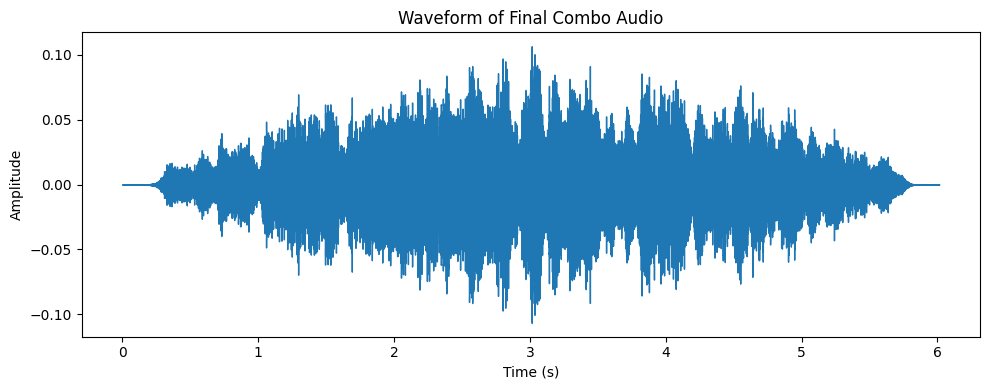

In [7]:
import matplotlib.pyplot as plt

y, sr = librosa.load("audio_tugas/final_combo.mp3")
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Final Combo Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()